### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
# Import popular libraries
library(ggplot2)
library(scales)
library(dplyr)
library(scales)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Inspecting the dataframes

In [6]:
dim(ny); dim(wash); dim(chi)

[1] 54770     9

[1] 89051     7

[1] 8630    9

Obviously Washington is 2 columns shorter, let's compare which columns they are

In [7]:
colnames(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [8]:
colnames(chi)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [9]:
colnames(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

Washington missed columns Gender and Birth date

## Group dataframes to have only one

In [10]:
# Add 2 columns for Washington to be able to concatenate columns
wash$Gender <- NA
wash$Birth.Year <- NA

In [11]:
# Add column that helps in identiying columns with 
ny$City.Name <- 'NYC'
wash$City.Name <- 'Washington'
chi$City.Name <- 'Chicago'

In [12]:
colnames(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "City.Name"

In [13]:
colnames(chi)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "City.Name"

In [14]:
colnames(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "City.Name"

In [15]:
# Concatenate all 3 dataframes

In [16]:
df <- rbind(ny,wash,chi)

In [17]:
colnames(df)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "City.Name"

In [18]:
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City.Name
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NYC
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NYC
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NYC
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NYC
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NYC
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NYC


## Exploring Dataframe

In [19]:
# This helps in knowing columns available for analysis
lapply(df, class)

$X
[1] "integer"

$Start.Time
[1] "factor"

$End.Time
[1] "factor"

$Trip.Duration
[1] "numeric"

$Start.Station
[1] "factor"

$End.Station
[1] "factor"

$User.Type
[1] "factor"

$Gender
[1] "factor"

$Birth.Year
[1] "numeric"

$City.Name
[1] "character"

In [20]:
str(df)

'data.frame':	152451 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 143945 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 143948 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: num  795 692 1325 703 329 ...
 $ Start.Station: Factor w/ 1585 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 1586 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...
 $ City.Name    : chr  "NYC" "NYC" "NYC" "NYC" ...


In [21]:
unique(df$Gender)

[1] Male   Female        <NA>  
Levels:  Female Male

In [22]:
unique(df$User.Type)

[1] Subscriber Customer             
Levels:  Customer Subscriber

In [23]:
dim(df)

[1] 152451     10

## Set 1: Popular times of travel

- What is the most common month?
- What is the most common day of week?
- What is the most common hour of day?


### What is the most common month?

In [24]:
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City.Name
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NYC
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NYC
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NYC
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NYC
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NYC
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NYC


In [25]:
# In general across al cities
colnames(df)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "City.Name"

In [26]:
df$Start.Time <- as.Date(df$Start.Time, format = "%Y-%m-%d")

In [27]:
df$End.Time <- as.Date(df$End.Time, format = "%Y-%m-%d")

In [28]:
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City.Name
5688089,2017-06-11,2017-06-11,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NYC
4096714,2017-05-11,2017-05-11,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NYC
2173887,2017-03-29,2017-03-29,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NYC
3945638,2017-05-08,2017-05-08,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NYC
6208972,2017-06-21,2017-06-21,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NYC
1285652,2017-02-22,2017-02-22,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NYC


In [29]:
df$Month <- month(df$Start.Time)

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

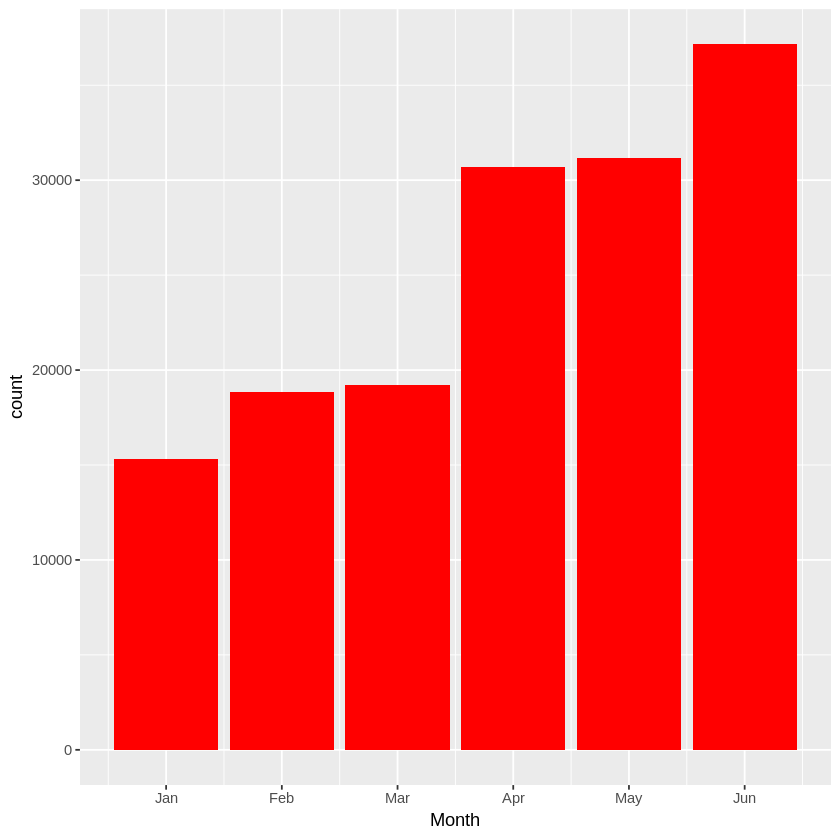

In [30]:
# Most popular month with all the cities
ggplot(aes(x = Month), data = df) +
    geom_bar(position = 'dodge', fill = "red")+
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

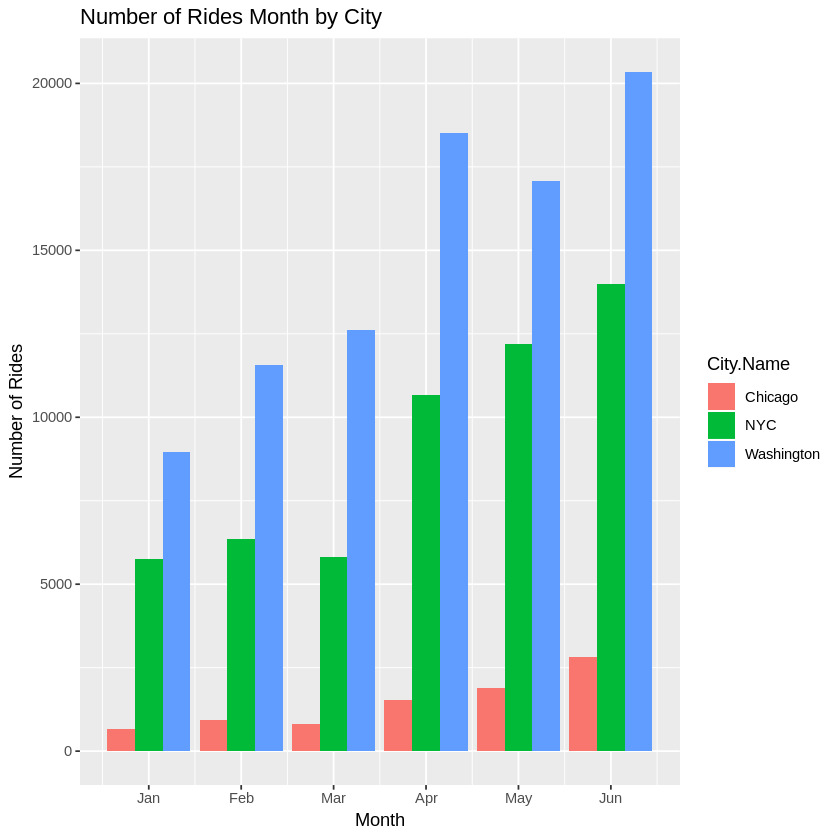

In [31]:
# Most popular month breakdown by cities
ggplot(aes(x = Month, fill = City.Name), data = df) +
    geom_bar(position = 'dodge') +
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
    ggtitle('Number of Rides Month by City') +
    labs(y = 'Number of Rides', x = 'Month')

### Summary Stats

In [62]:
# Number of records by month
table(df$City.Name)


   Chicago        NYC Washington 
      8630      54770      89051 

In [50]:
# Number of records by month
table(df$Month)


    1     2     3     4     5     6 
15341 18857 19235 30709 31157 37151 

In [54]:
# Average number of Trips per month
mean(table(df$Month))

[1] 25408.33

In [60]:
max(table(df$Month))

[1] 37151

In [61]:
min(table(df$Month))

[1] 15341

## Findings

- It is clear that June has the highest number of rides, probably because of active tourism and nice weather where people tend to go out more.
- Comparing all months, Washington has the highest number of trips but they all follow same trend regarding the months where June is highest
- Currently we have 25,408 number of trips among all months with a peak of 37,252 and a minimum of 15,341

### Question 2: What is the total travel time for users in different cities?

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

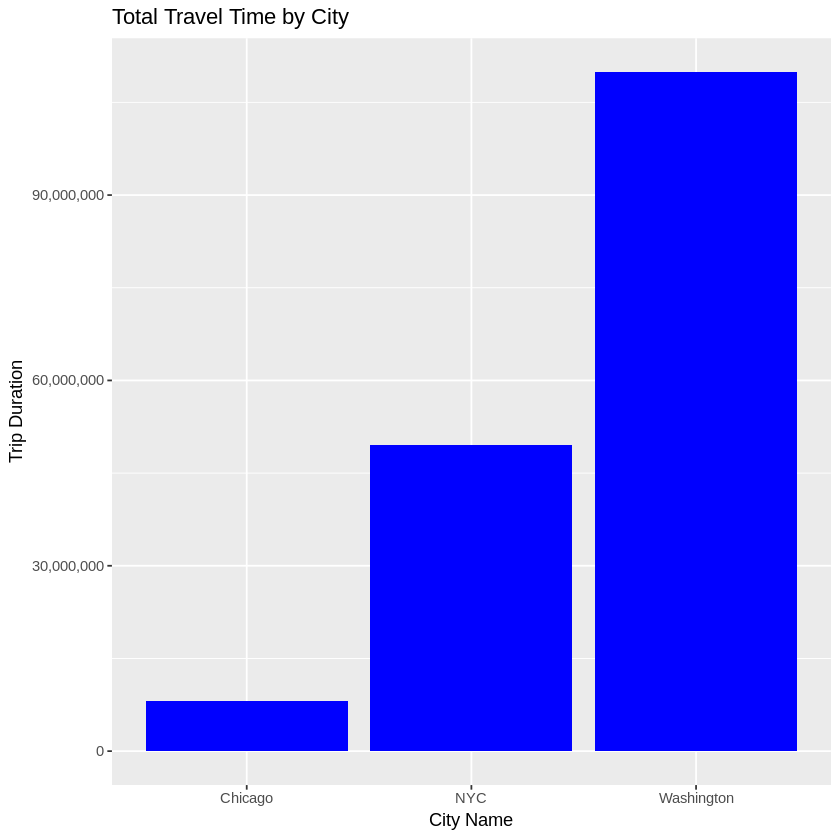

In [34]:
ggplot(aes(x = City.Name, y = Trip.Duration), data = df) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "sum", fill = "blue") + 
    scale_y_continuous(labels=function(x) format(x, big.mark = ",", scientific = FALSE))+
    ggtitle('Total Travel Time by City') +
    labs(y = 'Trip Duration', x = 'City Name')
    

### Summary stats

In [69]:
# Average Trip duration among all cities
mean(df$Trip.Duration, na.rm = TRUE)

[1] 1098.475

In [89]:
# Total Duration by city
sum_city <- aggregate(Trip.Duration ~ City.Name, df, sum)
sum_city

City.Name,Trip.Duration
Chicago,8087801
NYC,49490073
Washington,109883545


In [90]:
# Average Trip duration by city
avg_city <- aggregate(Trip.Duration ~ City.Name, df, mean)
avg_city

City.Name,Trip.Duration
Chicago,937.1728
NYC,903.6147
Washington,1233.9533


In [95]:
table(df$City.Name)/sum(table(df$City.Name))*100


   Chicago        NYC Washington 
  5.660835  35.926298  58.412867 

### Findings

- With more records Washington has the highest number of trip duration with 109,883,545 hours compared to 49, 490,073 for NewYork and 947 hours for Chicago
- The difference is basically because Washington has around 60% of the trips and chicago around 5%

### What are the counts of each gender by Trip(only available for NYC and Chicago)?

In [39]:
df_new <- df[df$City.Name != 'Washington',]

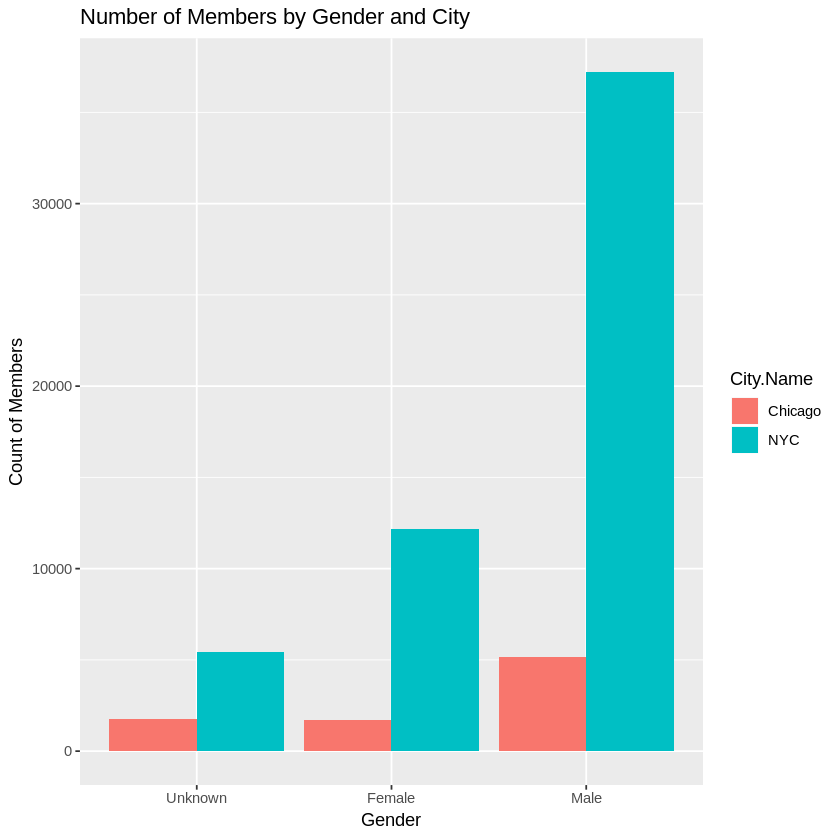

In [46]:
ggplot(aes(x = Gender, fill = City.Name), data = df_new) +
    geom_bar(position = 'dodge') + 
    scale_x_discrete(labels = c('Unknown', 'Female', 'Male')) +
    ggtitle('Number of Trips by Gender and City') +
    labs(y = 'Count of Trips', x = 'Gender')

### Summary Stats

In [99]:
aggregate(Trip.Duration ~ Gender, df, sum)

Gender,Trip.Duration
,13607365
Female,11984644
Male,31985865


In [96]:
table(df$Gender)/sum(table(df$Gender))*100


           Female     Male 
11.29022 21.89590 66.81388 

## Findings

- It is clear that Males have the highest percentage of riders, with 66% compared to 21% females which is a little expected knowing that bike riding is more popular with man than women
- Males have spent 31,985,865 while females spent 11,984,644 which makes males 3X more to ride a bike than females across both Chicago and New York City.
- It is clear that around 11% decided not disclose their gender


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')